In [ ]:
import pandas as pd, requests, bs4, re, numpy as np, tensorflow as tf, pytz
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from collections import Counter
from datetime import datetime

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.by import By
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 30.6 MB/s 
     |████████████████████████████████| 140 kB 57.9 MB/s 
     |████████████████████████████████| 384 kB 51.4 MB/s 
     |████████████████████████████████| 58 kB 5.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://security.ubuntu.com/ubuntu

In [ ]:
def parsedate(i):
    i=i.replace(' ','.')
    d=[None,'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    if '-' not in i:
        return (d.index(i[:3]),int(i[4:]))
    f=i.split('-')
    if '.' not in f[1]:
        return (d.index(f[0][:3]),int(f[1]))
    else:
        c=f[1].split('.')
        return (d.index(c[0]),int(c[1]))
def parsedate16(i):
    i=i.replace('May','May.')
    i=i.replace(' ','').replace('..','.')
    d=[None,'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    if '-' not in i:
        return (d.index(i[:3]),int(i[4:]))
    f=i.split('-')
    if '.' not in f[1]:
        return (d.index(f[0][:3]),int(f[1]))
    else:
        c=f[1].split('.')
        return (d.index(c[0]),int(c[1]))
def parsepres(s):
    i=s.find('+')
    if i<0:
        return 0
    elif s.startswith('Clinton'):
        return int(s[i+1:])
    else:
        return -int(s[i+1:])
def parsesen(s,key,republican):
    i=s.find('+')
    if i<0:
        return 0
    elif s.startswith(key):
        if republican:
            return -int(s[i+1:])
        else:
            return int(s[i+1:])
    else:
        if republican:
            return int(s[i+1:])
        else:
            return -int(s[i+1:])
def sumalliance(df,is_senate,entry):
    ppppp='party' if not is_senate else 'party_detailed'
    rc=set(df['candidate'])
    if len(rc)!=len(list(df['candidate'])):
        apart=list(df[ppppp])
        for j in rc:
            u=df[df['candidate']==j]
            r,d,m=False,'',''
            coalition=set(u[ppppp])
            if len(coalition)>1:
                sumvotes=sum(u['candidatevotes'])
                if 'REPUBLICAN' in coalition:
                    r=True
                else:
                    for i in coalition:
                        if str(i).startswith('DEMOCRAT'):
                            d=str(i)
                if d=='' and not r:
                    if len(u[ppppp])!=0:
                        m=list(u[ppppp])[0]
                    else:
                        m='WRITEIN'
                for i in coalition:
                    if i!='REPUBLICAN' and i!=d and i!=m:
                        df=df.drop(index=apart.index(i))
                if r:
                    ind=df[(df['candidate']==j) & (df[ppppp]=='REPUBLICAN')].index[0]
                elif d!='':
                    ind=df[(df['candidate']==j) & (df[ppppp]==d)].index[0]
                elif m!='':
                    if m!='WRITEIN':
                        ind=df[(df['candidate']==j) & (df[ppppp]==m)].index[0]
                if m!='WRITEIN':
                    df.at[ind,'candidatevotes']=sumvotes
        df.index=list(range(len(df)))
        return df
    else:
        return df
def rank(val):
    num=0
    for i in mmmmm:
        if i>=val:
            num+=mmmmm[i]
    n=''
    if mmmmm[val]>1:
        n+='T-'
        num-=mmmmm[val]-1
    n+=str(num)
    if n[-1]=='1':
        return n+'st'
    elif n[-1]=='2':
        return n+'nd'
    elif n[-1]=='3':
        return n+'rd'
    else:
        return n+'th'

In [ ]:
sc={'alabama':7,'alaska':1,'arizona':9,'arkansas':4,'california':53,'colorado':7,'connecticut':5,'delaware':1,'florida':27,'georgia':14,'hawaii':2,'idaho':2,'illinois':18,'indiana':9,'iowa':4,'kansas':4,'kentucky':6,'louisiana':6,'maine':2,'maryland':8,'massachusetts':9,'michigan':14,'minnesota':8,'mississippi':4,'missouri':8,'montana':1,'nebraska':3,'nevada':4,'new-hampshire':2,'new-jersey':12,'new-mexico':3,'new-york':27,'north-carolina':13,'north-dakota':1,'ohio':16,'oklahoma':5,'oregon':5,'pennsylvania':18,'rhode-island':2,'south-carolina':7,'south-dakota':1,'tennessee':9,'texas':36,'utah':4,'vermont':1,'virginia':11,'washington':10,'west-virginia':3,'wisconsin':8,'wyoming':1}

In [ ]:
stem='https://projects.fivethirtyeight.com/polls/'
leaves=[]
dontinclude=['senate/2018/california/','senate/2018/mississippi/','senate/2018/minnesota/','senate/2020/georgia/','house/2020/california/53','house/2020/washington/10','house/2021/texas/6/','house/2021/louisiana/2/','governor/2021/california']
for j in range(2018,2022):
    for k in sc:
        if j%4==0:
            leaves.append('president-general/2020/'+k+'/')
        for i in ['governor','senate']:
            if i+'/'+str(j)+'/'+k+'/' not in dontinclude:
                leaves.append(i+'/'+str(j)+'/'+k+'/')
        for i in range(1,sc[k]+1):
            if 'house/'+str(j)+'/'+k+'/'+str(i)+'/' not in dontinclude:
                leaves.append('house/'+str(j)+'/'+k+'/'+str(i)+'/')

In [ ]:
bigthing=pd.DataFrame()
for election in leaves:
    try:
        url=stem+election
        beef=pd.DataFrame()
        wd = webdriver.Chrome('chromedriver',options=chrome_options)
        wd.get(url)
        try:
            bbbbb=wd.find_element(By.CLASS_NAME,'more-polls')
            while wd.find_element(By.CLASS_NAME,'show-more-wrap').get_attribute('style')!='display: none;':
                bbbbb.click()
            print(election)
        except:
            1
        s=bs4.BeautifulSoup(wd.page_source,'html.parser')
        for i in s.find_all('div', {'class':re.compile(r'grade hide-mobile|tooltip pollster')}):
            i.decompose()
        for i in s.find_all('td', {'class':re.compile(r'dates hide-desktop|more|sponsor|(answer|answers|value) (first )?hide-(mobile|desktop).*|evenSpacer')}):
            i.decompose()
        for i in s.find_all('span', {'class':'incumbent'}):
            i.decompose()
        for i in s.find_all('tr', {'class':'expandable-row'}):
            i.decompose()
        for i in s.find_all('td', {'class':'net hide-mobile rep'}):
            i.string='-'+str(int(i.string))
        for i in s.find_all('td', {'class':'net hide-mobile dem'}):
            i.string='+'+str(int(i.string))
        for i in s.find_all('td', {'class':'net hide-mobile even'}):
            i.string='0'
        dfs=pd.read_html(str(s).replace('\xa0', ' ').replace('*',''))
        for i in dfs[1:]:
            beef=beef.append(i)
        beef.columns=['dates','sample','voter type', 'pollster','leader','margin']
        beef['end date']=beef['dates'].apply(parsedate)
        beef=beef.sort_values(by=['pollster'], ascending=[1])
        d=dict()
        placedpolls=set()
        beef.index=list(range(len(beef)))
        for i in range(len(beef)):
            p=beef.loc[i,'pollster']
            if p not in placedpolls:
                placedpolls.add(p)
                d[p]=[beef.loc[i,'margin']]
            else:
                beef=beef.drop(index=i)
        beef.index=list(range(len(beef)))
        d['Name']=election
        bigthing=bigthing.append(pd.DataFrame(d))
    except:
        1
c=sorted(list(bigthing.columns))
bigthing.index=list(range(len(bigthing)))
c.remove('Name')
nc=['Name']
nc.extend(c)
bigthing=bigthing[nc]
bigthing['actual-result']=np.nan

governor/2018/alabama/
governor/2018/alaska/
house/2018/alaska/1/
governor/2018/arizona/
senate/2018/arizona/
house/2018/arizona/1/
house/2018/arizona/2/
house/2018/arizona/4/
house/2018/arizona/6/
house/2018/arizona/8/
governor/2018/arkansas/
house/2018/arkansas/1/
house/2018/arkansas/2/
house/2018/arkansas/3/
house/2018/arkansas/4/
governor/2018/california/
house/2018/california/4/
house/2018/california/7/
house/2018/california/10/
house/2018/california/16/
house/2018/california/21/
house/2018/california/22/
house/2018/california/24/
house/2018/california/25/
house/2018/california/39/
house/2018/california/45/
house/2018/california/48/
house/2018/california/49/
house/2018/california/50/
governor/2018/colorado/
house/2018/colorado/3/
house/2018/colorado/6/
governor/2018/connecticut/
senate/2018/connecticut/
senate/2018/delaware/
house/2018/delaware/1/
governor/2018/florida/
senate/2018/florida/
house/2018/florida/1/
house/2018/florida/6/
house/2018/florida/7/
house/2018/florida/9/
hou

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
for state in sc.keys():
    url='https://projects.fivethirtyeight.com/2016-election-forecast/'+state+'/'
    wd = webdriver.Chrome('chromedriver',options=chrome_options)
    wd.get(url)
    bbbbb=wd.find_element(By.CLASS_NAME,'more-polls')
    while wd.find_element(By.CSS_SELECTOR,'div[class*="more-polls btn-cta"]').get_attribute('class')!='more-polls btn-cta hidden':
        bbbbb.click()
    s=bs4.BeautifulSoup(wd.page_source,'html.parser')
    for i in s.find_all('div', {'class':'sortdir'}):
        i.decompose()
    dfs=pd.read_html(str(s).replace('\xa0', ' ').replace('*',''))
    d=dfs[3]
    n=pd.DataFrame()
    n['dates']=d['DATES']
    n['pollster']=d['POLLSTER']
    n['sample']=d['SAMPLE']
    n['voter type']=d['SAMPLE.1']
    n['leader']=d['LEADER']
    n['margin']=n['leader'].apply(parsepres)
    n['end date']=n['dates'].apply(parsedate16)
    n=n.sort_values(by=['end date','pollster'], ascending=[0,1])
    n.index=range(len(n.index))
    print(state+' president 2016')
    d=dict()
    placedpolls=set()
    n.index=list(range(len(n)))
    for i in range(len(n)):
        p=n.loc[i,'pollster']
        if p not in placedpolls:
            placedpolls.add(p)
            d[p]=[n.loc[i,'margin']]
        else:
            n=n.drop(index=i)
    n.index=list(range(len(n)))
    d['Name']='president-general/2016/'+state+'/'
    bigthing=bigthing.append(pd.DataFrame(d))
    if state not in ['alaska','california','louisiana','oklahoma']:
        try:
            url='https://projects.fivethirtyeight.com/2016-election-forecast/senate/'+state+'/'
            wd = webdriver.Chrome('chromedriver',options=chrome_options)
            wd.get(url)
            try:
                bbbbb=wd.find_element(By.CLASS_NAME,'more-polls')
                while wd.find_element(By.CSS_SELECTOR,'div[class*="more-polls]').get_attribute('class')!='more-polls btn-cta hidden':
                    bbbbb.click()
            except:
                1
            s=bs4.BeautifulSoup(wd.page_source,'html.parser')
            for i in s.find_all('div', {'class':'sortdir'}):
                i.decompose()
            for i in s.find_all('span', {'class':re.compile('incumbent')}):
                i.decompose()
            dem,rep='',''
            for i in s.find_all('div', {'class':'cardset current'}):
                for j in i.find_all('div',{'class':re.compile('candidate \w* dem')}):
                    for k in j.find_all('p',{'class':'label label-head'}):
                        dem=k.string
                for j in i.find_all('div',{'class':re.compile('candidate \w* rep')}):
                    for k in j.find_all('p',{'class':'label label-head'}):
                        rep=k.string
            dfs=pd.read_html(str(s).replace('\xa0', ' ').replace('*',''))
            d=dfs[2]
            a=set(d['LEADER'])
            if 'Tie' in a:
                a.remove('Tie')
            bbb=list(a)[0]
            print(state+' senate 2016:',dem,'vs',rep)
            cccc=bbb[:bbb.find('+')-1]
            if rep.find(cccc)<0 and dem.find(cccc)>=0:
                d['margin']=d['LEADER'].apply(lambda x:parsesen(x,cccc,0))
            elif rep.find(cccc)>=0 and dem.find(cccc)<0:
                d['margin']=d['LEADER'].apply(lambda x:parsesen(x,cccc,1))
            n=pd.DataFrame()
            n['dates']=d['DATES']
            n['pollster']=d['POLLSTER']
            n['sample']=d['SAMPLE']
            n['voter type']=d['SAMPLE.1']
            n['leader']=d['LEADER']
            n['margin']=d['margin']
            n['end date']=n['dates'].apply(parsedate16)
            n=n.sort_values(by=['end date','pollster'], ascending=[0,1])
            n.index=range(len(n.index))
            d=dict()
            placedpolls=set()
            n.index=list(range(len(n)))
            for i in range(len(n)):
                p=n.loc[i,'pollster']
                if p not in placedpolls:
                    placedpolls.add(p)
                    d[p]=[n.loc[i,'margin']]
                else:
                    n=n.drop(index=i)
            n.index=list(range(len(n)))
            d['Name']='senate/2016/'+state+'/'
            bigthing=bigthing.append(pd.DataFrame(d))
        except:
            1
c=sorted(list(bigthing.columns))
bigthing.index=list(range(len(bigthing)))
c.remove('Name')
nc=['Name']
nc.extend(c)
bigthing=bigthing[nc]
bigthing['actual-result']=np.nan
bigthing.to_csv('2016 2018-2021 hsgp.csv')
bigthing

alabama president 2016


NameError: ignored

In [ ]:
bigthing.index=range(len(bigthing.index))
aaaaa=sorted(list(bigthing.columns))
aaaaa.remove('actual-result')
aaaaa.remove('Name')
aaaaa.insert(0,'Name')
aaaaa.append('actual-result')
bigthing=bigthing[aaaaa]
bigthing

,Name,1892 Polling,1st Tuesday Campaigns,20/20 Insight,ABC News,ABC News/The Washington Post,ALG Research,AYTM,Abt SRBI,Alaska Survey Research,...,Y2 Analytics,YouGov,Zia Poll,Zogby Analytics,Zogby Interactive/JZ Analytics,brilliant corners Research & Strategies,co/efficient,icitizen,Øptimus,actual-result
0,governor/2018/alabama/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,governor/2018/alaska/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,house/2018/alaska/1/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,governor/2018/arizona/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,senate/2018/arizona/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,senate/2016/washington/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514,president-general/2016/west-virginia/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515,president-general/2016/wisconsin/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
516,senate/2016/wisconsin/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
house=open('1976-2020-house.csv')
senate=open('2016-2020-senate.csv')
governor=open('2018-2021-governor.csv')
president=open('1976-2020-president.csv')
hous=pd.read_csv(house, encoding = 'utf-8')
sena=pd.read_csv(senate, encoding = "utf-8")
gove=pd.read_csv(governor, encoding = 'utf-8')
pres=pd.read_csv(president, encoding = 'utf-8')
for i in range(len(bigthing)):
    entry=bigthing.loc[i,'Name'].split('/')
    if entry[0]=='house':
        entry[1]=int(entry[1])
        entry[2]=entry[2].replace('-',' ').upper()
        entry[3]=int(entry[3])
        ae=hous[(hous['year']==int(entry[1])) & (hous['state']==(entry[2])) & ((hous['district']==entry[3]) | ((hous['district']==0) & (1==entry[3])))]
        ae.index=list(range(len(ae)))
        ae=sumalliance(ae,0,entry)
        ae=ae.sort_values(by=['candidatevotes'],ascending=[0])
        ae.index=list(range(len(ae)))
        if len(ae)>1:
            margin=(ae.loc[0,'candidatevotes']-ae.loc[1,'candidatevotes'])/ae.loc[0,'totalvotes']*100
            if ae.loc[0,'party']=='REPUBLICAN' and ae.loc[1,'party'].startswith('DEMOCRAT'):
                margin*=-1
                bigthing.loc[i,'actual-result']=margin
            elif ae.loc[1,'party']=='REPUBLICAN' and ae.loc[0,'party'].startswith('DEMOCRAT'):
                margin*=1
                bigthing.loc[i,'actual-result']=margin
            else:
                bigthing=bigthing.drop(index=i)
                print(entry)
        else:
            bigthing=bigthing.drop(index=i)
            print(entry)
    elif entry[0]=='senate':
        entry[1]=int(entry[1])
        entry[2]=entry[2].replace('-',' ').upper()
        ae=sena[(sena['year']==int(entry[1])) & (sena['state']==(entry[2]))]
        ae.index=list(range(len(ae)))
        ae=sumalliance(ae,1,entry)
        ae=ae.sort_values(by=['candidatevotes'],ascending=[0])
        ae.index=list(range(len(ae)))
        if len(ae)>1:
            margin=(ae.loc[0,'candidatevotes']-ae.loc[1,'candidatevotes'])/ae.loc[0,'totalvotes']*100
            if ae.loc[0,'party_detailed']=='REPUBLICAN' and ae.loc[1,'party_detailed'].startswith('DEMOCRAT'):
                margin*=-1
                bigthing.loc[i,'actual-result']=margin
            elif ae.loc[1,'party_detailed']=='REPUBLICAN' and ae.loc[0,'party_detailed'].startswith('DEMOCRAT'):
                margin*=1
                bigthing.loc[i,'actual-result']=margin
            else:
                bigthing=bigthing.drop(index=i)
                print(entry)
        else:
            bigthing=bigthing.drop(index=i)
            print(entry)
    elif entry[0]=='governor':
        entry[1]=int(entry[1])
        entry[2]=entry[2].replace('-',' ').upper()
        ae=gove[(gove['year']==int(entry[1])) & (gove['state']==(entry[2]))]
        ae=ae.sort_values(by=['votes'],ascending=[0])
        ae.index=list(range(len(ae)))
        if len(ae)>1:
            margin=(ae.loc[0,'votes']-ae.loc[1,'votes'])/ae.loc[0,'total']*100
            if ae.loc[0,'party']=='REPUBLICAN' and ae.loc[1,'party'].startswith('DEMOCRAT'):
                margin*=-1
                bigthing.loc[i,'actual-result']=margin
            elif ae.loc[1,'party']=='REPUBLICAN' and ae.loc[0,'party'].startswith('DEMOCRAT'):
                margin*=1
                bigthing.loc[i,'actual-result']=margin
            else:
                bigthing=bigthing.drop(index=i)
                print(entry)
        else:
            bigthing=bigthing.drop(index=i)
            print(entry)
    else:
        entry[1]=int(entry[1])
        entry[2]=entry[2].replace('-',' ').upper()
        ae=pres[(pres['year']==int(entry[1])) & (pres['state']==(entry[2]))]
        ae.index=list(range(len(ae)))
        ae=sumalliance(ae,1,entry)
        ae=ae.sort_values(by=['candidatevotes'],ascending=[0])
        ae.index=list(range(len(ae)))
        if len(ae)>1:
            margin=(ae.loc[0,'candidatevotes']-ae.loc[1,'candidatevotes'])/ae.loc[0,'totalvotes']*100
            if ae.loc[0,'party_detailed']=='REPUBLICAN' and ae.loc[1,'party_detailed'].startswith('DEMOCRAT'):
                margin*=-1
                bigthing.loc[i,'actual-result']=margin
            elif ae.loc[1,'party_detailed']=='REPUBLICAN' and ae.loc[0,'party_detailed'].startswith('DEMOCRAT'):
                margin*=1
                bigthing.loc[i,'actual-result']=margin
            else:
                bigthing=bigthing.drop(index=i)
                print(entry)
        else:
            bigthing=bigthing.drop(index=i)
            print(entry)
bigthing.index=list(range(len(bigthing)))
bigthing.to_csv('2016-2021 hsgp.csv')

['house', 2018, 'MISSISSIPPI', 2, '']
['house', 2018, 'PENNSYLVANIA', 18, '']
['house', 2019, 'NORTH CAROLINA', 3, '']
['house', 2019, 'NORTH CAROLINA', 9, '']
['senate', 2020, 'ARKANSAS', '']
['house', 2020, 'CALIFORNIA', 53, '']
['house', 2020, 'WASHINGTON', 10, '']
['governor', 2021, 'CALIFORNIA', '']
['house', 2021, 'NEW MEXICO', 1, '']
['house', 2021, 'OHIO', 15, '']


In [ ]:
stem='https://projects.fivethirtyeight.com/polls/'
leaves=[]
j=2022
for k in sc:
    for i in ['governor','senate']:
        leaves.append(i+'/'+str(j)+'/'+k+'/')
    for i in range(1,sc[k]+4):
        leaves.append('house/'+str(j)+'/'+k+'/'+str(i)+'/')

In [ ]:
bigthing=pd.read_csv('2016-2021 hsgp.csv',index_col=0)

In [ ]:
bigthingy=pd.DataFrame()
for election in leaves:
    try:
        url=stem+election
        beef=pd.DataFrame()
        wd = webdriver.Chrome('chromedriver',options=chrome_options)
        wd.get(url)
        try:
            bbbbb=wd.find_element(By.CLASS_NAME,'more-polls')
            while wd.find_element(By.CLASS_NAME,'show-more-wrap').get_attribute('style')!='display: none;':
                bbbbb.click()
            print(election)
        except:
            1
        s=bs4.BeautifulSoup(wd.page_source,'html.parser')
        for i in s.find_all('div', {'class':re.compile(r'grade hide-mobile|tooltip pollster')}):
            i.decompose()
        for i in s.find_all('td', {'class':re.compile(r'dates hide-desktop|more|sponsor|(answer|answers|value) (first )?hide-(mobile|desktop).*|evenSpacer')}):
            i.decompose()
        for i in s.find_all('span', {'class':'incumbent'}):
            i.decompose()
        for i in s.find_all('tr', {'class':'expandable-row'}):
            i.decompose()
        for i in s.find_all('td', {'class':'net hide-mobile rep'}):
            i.string='-'+str(int(i.string))
        for i in s.find_all('td', {'class':'net hide-mobile dem'}):
            i.string='+'+str(int(i.string))
        for i in s.find_all('td', {'class':'net hide-mobile even'}):
            i.string='0'
        dfs=pd.read_html(str(s).replace('\xa0', ' '))
        for i in dfs[1:]:
            beef=beef.append(i)
        beef.columns=['dates','sample','voter type', 'pollster','leader','margin']
        beef['end date']=beef['dates'].apply(parsedate)
        beef=beef.sort_values(by=['pollster'], ascending=[1])
        d=dict()
        placedpolls=set()
        beef.index=list(range(len(beef)))
        for i in range(len(beef)):
            p=beef.loc[i,'pollster']
            if p not in placedpolls:
                placedpolls.add(p)
                d[p]=[beef.loc[i,'margin']]
            else:
                beef=beef.drop(index=i)
        beef.index=list(range(len(beef)))
        d['Name']=election
        bigthingy=bigthingy.append(pd.DataFrame(d))
    except:
        1
c=sorted(list(bigthingy.columns))
print(c)
bigthingy.index=list(range(len(bigthingy)))
c.remove('Name')
nc=['Name']
nc.extend(c)
bigthingy=bigthingy[nc]
dontinclude=[
    'senate/2022/alaska/',
    'senate/2022/louisiana/',
    'senate/2022/oklahoma/',
    'senate/2022/utah/',
    'house/2022/north-dakota/1/',
    'house/2022/montana/2/',
    'house/2022/south-dakota/1/',
    'governor/2022/alaska/'
]
for i in range(len(bigthingy.index)):
    if bigthingy.loc[i,'Name'] in dontinclude:
        bigthingy=bigthingy.drop(i)
bigthingy.index=list(range(len(bigthingy)))
alr=bigthing.columns
nc=sorted(list(set(alr).intersection(bigthingy.columns)))
nc.remove('Name')
c=['Name']
c.extend(nc)
reduced=bigthingy[c]
for i in alr:
    if i not in reduced.columns:
        reduced[i]=np.nan
reduced=reduced[alr]
r=reduced.fillna(999999999)
for i in range(len(r.index)):
    if len(set(r.loc[i]))-1==1:
        reduced=reduced.drop(i)
reduced.index=list(range(len(reduced)))
reduced.to_csv('testing set '+datetime.now(pytz.timezone('America/New_York')).isoformat()+'.csv')
reduced

governor/2022/alabama/
senate/2022/alabama/
governor/2022/alaska/
senate/2022/alaska/
house/2022/alaska/1/
governor/2022/arizona/
senate/2022/arizona/
house/2022/arizona/1/
house/2022/arizona/2/
house/2022/arizona/4/
house/2022/arizona/6/
governor/2022/arkansas/
senate/2022/arkansas/
governor/2022/california/
senate/2022/california/
house/2022/california/9/
house/2022/california/13/
house/2022/california/21/
house/2022/california/22/
house/2022/california/26/
house/2022/california/27/
house/2022/california/40/
house/2022/california/41/
house/2022/california/49/
governor/2022/colorado/
senate/2022/colorado/
house/2022/colorado/3/
house/2022/colorado/7/
house/2022/colorado/8/
governor/2022/connecticut/
senate/2022/connecticut/
house/2022/connecticut/2/
house/2022/connecticut/4/
house/2022/connecticut/5/
house/2022/delaware/1/
governor/2022/florida/
senate/2022/florida/
house/2022/florida/1/
house/2022/florida/2/
house/2022/florida/4/
house/2022/florida/13/
house/2022/florida/15/
house/20

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


,Name,1892 Polling,1st Tuesday Campaigns,20/20 Insight,ABC News,ABC News/The Washington Post,ALG Research,AYTM,Abt SRBI,Alaska Survey Research,...,Y2 Analytics,YouGov,Zia Poll,Zogby Analytics,Zogby Interactive/JZ Analytics,brilliant corners Research & Strategies,co/efficient,icitizen,Øptimus,actual-result
0,governor/2022/alabama/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,senate/2022/alabama/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,house/2022/alaska/1/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,governor/2022/arizona/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,-3.0,NaN,NaN,NaN
4,senate/2022/arizona/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,governor/2022/wisconsin/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,senate/2022/wisconsin/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,house/2022/wisconsin/3/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,governor/2022/wyoming/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
reduced=pd.read_csv('testing set 2022-11-05T10:15:03.522109-04:00.csv')

In [ ]:
temp=bigthing.fillna(999).drop(columns=['Name','actual-result'])
tempct=0
for i in temp.index:
    if len(set(temp.loc[i]))<=2:
        print(i,bigthing.loc[i,'Name'],set(temp.loc[i]))
        temp=temp.drop(i)
        tempct+=1
print(len(temp.index),"entries left,",tempct,"removed")
tempct=0
for i in temp.columns:
    if len(set(temp[i]))==1:
        print(i,set(temp[i]))
        temp=temp.drop(columns=i)
        tempct+=1
print(len(temp.columns),"attributes left,",tempct,"removed")

reduced=reduced[bigthing.columns]
temp=reduced.fillna(999).drop(columns=['Name','actual-result'])
tempct=0
for i in temp.index:
    if len(set(temp.loc[i]))<=2:
        print(i,reduced.loc[i,'Name'],set(temp.loc[i]))
        temp=temp.drop(i)
        tempct+=1
print(len(temp.index),"entries left,",tempct,"removed")
reduced.index=temp.index

KeyError: ignored

In [ ]:
#maybe remove all entries in dataset where polls only show 0, then remove all polls with no results
#remove elections with only one poll
c=bigthing
c.index=list(range(len(c)))
c=c.replace(0,0.000000001)
c=c.fillna(0)
d=c.drop(columns=['Name'])
x,y=d.drop(columns=['actual-result']),d['actual-result']
class WeightAv(layers.Layer):
    def __init__(self, units=1, input_dim=298):
        super(WeightAv, self).__init__()
        w_init = tf.random_normal_initializer()
        self.w = self.add_weight(shape=(input_dim, units), initializer=tf.keras.initializers.RandomNormal(1,.05), trainable=True, constraint=lambda x: tf.clip_by_value(x, 0.00001, 1000))
    def call(self, inputs):
        w=self.w
        weightedsum=tf.matmul(inputs,w)
        chosenweights=tf.math.not_equal(inputs,0.0)
        replacewithones=tf.cast(chosenweights,'int32')
        replacewithones=tf.cast(replacewithones,'float32')
        weightsum=tf.matmul(replacewithones,w)
        return tf.divide(weightedsum,weightsum)
input_layer = tf.keras.Input(shape=[len(x.columns)])
dink = WeightAv(1,len(x.columns))(input_layer)
model = tf.keras.Model(inputs=input_layer, outputs=dink)
model.summary()
for l in model.layers:
    print(l.name, l.trainable)
model.compile(metrics="mean_absolute_error",loss="mean_squared_error")
# test=tf.constant(list(x.loc[0]))
# print(set(x.loc[0]))
# test=tf.reshape(test,[1,len(x.columns)])
# WeightAv(1,len(x.columns))(test)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 391)]             0         
                                                                 
 weight_av (WeightAv)        (None, 1)                 391       
                                                                 
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________
input_1 True
weight_av True


Epoch 1/750
16/16 [==============================] - 3s 3ms/step - loss: 56.5797 - mean_absolute_error: 5.8183
Epoch 2/750
16/16 [==============================] - 0s 3ms/step - loss: 56.4760 - mean_absolute_error: 5.8113
Epoch 3/750
16/16 [==============================] - 0s 3ms/step - loss: 56.3934 - mean_absolute_error: 5.8061
Epoch 4/750
16/16 [==============================] - 0s 3ms/step - loss: 56.3100 - mean_absolute_error: 5.8007
Epoch 5/750
16/16 [==============================] - 0s 3ms/step - loss: 56.2291 - mean_absolute_error: 5.7958
Epoch 6/750
16/16 [==============================] - 0s 3ms/step - loss: 56.1469 - mean_absolute_error: 5.7905
Epoch 7/750
16/16 [==============================] - 0s 3ms/step - loss: 56.0684 - mean_absolute_error: 5.7854
Epoch 8/750
16/16 [==============================] - 0s 3ms/step - loss: 55.9918 - mean_absolute_error: 5.7806
Epoch 9/750
16/16 [==============================] - 0s 3ms/step - loss: 55.9129 - mean_absolute_error: 5.7756
E

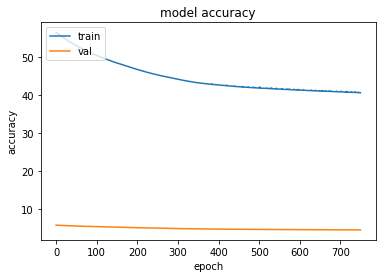

In [ ]:
a=model.fit(x,y,epochs=750)
for i in a.history.keys():
    plt.plot(a.history[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
modelweights=[(model.layers[1].get_weights()[0].tolist()[n][0],x.columns[n]) for n in range(len(x.columns))]
wts=pd.DataFrame([i for i in modelweights])
wts.columns=['weight','index']
wts=wts.sort_values(['weight','index'],0,[0,1])
mmmmm=Counter(wts['weight'])
wts.index=[rank(i) for i in wts['weight']]
wts

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_values except for the argument 'by' will be keyword-only
  after removing the cwd from sys.path.


,weight,index
1st,5.947825,"Fabrizio, Lee & Associates"
2nd,5.714414,Wick
3rd,5.161726,InsiderAdvantage
4th,5.107975,Research & Polling
5th,4.790896,Crosswind Media & Public Relations
...,...,...
T-273rd,0.000010,Victory Geek
T-273rd,0.000010,Winthrop University
T-273rd,0.000010,Y2 Analytics
T-273rd,0.000010,Zia Poll


In [ ]:
yhat=pd.DataFrame(model.predict(x))
import numpy as np
b=pd.DataFrame()
b['Name']=list(c['Name'])
b['yhat']=yhat
b['yhat-parity']=yhat/abs(yhat)
b['actual']=y
b['actual-parity']=pd.DataFrame(y/abs(y))
b['correct-parity']=np.where(b['actual-parity']==b['yhat-parity'],True,False)
b['difference']=abs(b['actual']-b['yhat'])
b

16/16 [==============================] - 0s 2ms/step


,Name,yhat,yhat-parity,actual,actual-parity,correct-parity,difference
0,governor/2018/alabama/,-19.080278,-1.0,-19.072115,-1.0,True,0.008163
1,governor/2018/alaska/,-6.423599,-1.0,-7.025649,-1.0,True,0.602050
2,house/2018/alaska/1/,-3.809573,-1.0,-6.584776,-1.0,True,2.775203
3,governor/2018/arizona/,-14.981168,-1.0,-14.160756,-1.0,True,0.820412
4,senate/2018/arizona/,5.679907,1.0,2.344496,1.0,True,3.335411
...,...,...,...,...,...,...,...
503,senate/2016/washington/,14.951402,1.0,18.026021,1.0,True,3.074619
504,president-general/2016/west-virginia/,-34.294624,-1.0,-42.153647,-1.0,True,7.859022
505,president-general/2016/wisconsin/,6.867861,1.0,-0.764343,-1.0,False,7.632204
506,senate/2016/wisconsin/,2.717432,1.0,-3.361977,-1.0,False,6.079409


In [ ]:
wrong=b[b['correct-parity']==False]
wrong

,Name,yhat,yhat-parity,actual,actual-parity,correct-parity,difference
20,house/2018/california/21/,-11.000000,-1.0,0.758696,1.0,False,11.758696
36,governor/2018/florida/,1.548686,1.0,-0.394900,-1.0,False,1.943586
64,senate/2018/indiana/,0.726097,1.0,-5.890172,-1.0,False,6.616269
94,house/2018/michigan/8/,-0.290397,-1.0,3.834388,1.0,False,4.124785
112,governor/2018/nevada/,-1.410352,-1.0,4.083869,1.0,False,5.494221
113,senate/2018/nevada/,-0.100560,-1.0,5.026992,1.0,False,5.127553
123,house/2018/new-jersey/3/,-1.080595,-1.0,1.294664,1.0,False,2.375258
130,house/2018/new-mexico/2/,-0.925637,-1.0,1.867949,1.0,False,2.793585
144,house/2018/north-carolina/7/,4.000000,1.0,-12.741577,-1.0,False,16.741577
145,house/2018/north-carolina/9/,3.528400,1.0,-0.320108,-1.0,False,3.848508


In [ ]:
testcases=reduced
x_2022=testcases.drop(['Name','actual-result'],1)
x_2022=x_2022.replace(0,-0.0000000000000000000000001)
x_2022=x_2022.fillna(0)
epred=pd.DataFrame()
epred['Name']=testcases['Name']
epred['prediction']=model.predict(x_2022)
epred

6/6 [==============================] - 0s 3ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Name,prediction
0,governor/2022/alabama/,-34.000000
1,senate/2022/alabama/,-30.000000
2,house/2022/alaska/1/,19.843840
3,governor/2022/arizona/,-1.730699
4,senate/2022/arizona/,3.868832
...,...,...
156,governor/2022/wisconsin/,0.042146
157,senate/2022/wisconsin/,-1.514450
158,house/2022/wisconsin/3/,-12.728751
159,governor/2022/wyoming/,-52.000000


In [ ]:
timestamp=datetime.now(pytz.timezone('America/New_York')).isoformat()
b.to_csv('2018-2021 predictions '+timestamp+'.csv')
epred.to_csv('2022 predictions '+timestamp+'.csv')
wts.to_csv('model weights '+timestamp+'.csv')

In [ ]:
# use levenshtein distance to match candidates in 538 polls vs real results, use to filter out polls and stuff which contains competitors
# adjust for house effects by taking polls, comparing them to actual, and averaging bias or smth
# use generic ballot to adjust
# adjust based on adults, registered, likely? maybe change up

In [ ]:
# add bias for partisan polls?
# for house effects get all polls and compare to actual results

In [ ]:
!pip install install scikit-learn==0.23.2
!pip install hmni
import pandas as pd, hmni
state_names=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]
def findavgbias(polls):
    avg=sum(polls)/len(polls)
    return avg
matcher = hmni.Matcher(model='latin')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 14.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.2 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.2 MB 4.0 MB/s 
     |████████████████████████████████| 235 kB 68.3 MB/s 
     |████████████████████████████████| 886 kB 60.9 MB/s 


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator MaxAbsScaler from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use

In [ ]:
govidict=dict()
govpolls=pd.read_csv('governor_polls_historical.csv')
govpolls=govpolls[govpolls['state'].isin(state_names)]
for i in set(govpolls['race_id']):
    govidict[i]=govpolls[govpolls['race_id']==i]
    for j in set(govidict[i]['question_id']):
        poll=govidict[i][govidict[i]['question_id']==j].sort_values('pct',ascending=0)
        leader=tuple(poll['answer'])[0]
        ttparties=tuple(poll['party'])[:2]
        pcts=tuple(poll['pct'])
        mov=pcts[0]-pcts[1]
        if not('DEM' in ttparties and 'REP' in ttparties):
            govidict[i]=govidict[i].drop(poll.index)

In [ ]:
senidict=dict()
senpolls=pd.read_csv('senate_polls_historical.csv')
senres=pd.read_csv('2016-2020-senate.csv')
senpolls=senpolls[senpolls['state'].isin(state_names)]
for i in set(senpolls['race_id']):
    senidict[i]=senpolls[(senpolls['race_id']==i) & (senpolls['fte_grade']!='F')]
    for j in set(senidict[i]['question_id']):
        poll=senidict[i][senidict[i]['question_id']==j].sort_values('pct',ascending=0)
        leader=tuple(poll['answer'])[0]
        ttparties=tuple(poll['party'])[:2]
        pcts=tuple(poll['pct'])
        mov=pcts[0]-pcts[1]
        if not('DEM' in ttparties and 'REP' in ttparties):
            senidict[i]=senidict[i].drop(poll.index)
    if len(senidict[i].index)>0:
        year,state=list(set(senidict[i]['cycle']))[0],list(set(senidict[i]['state']))[0].upper()
        actual=senres[(senres['year']==year) & (senres['state']==state)].sort_values('candidatevotes',ascending=0)
        adem,arep=list(actual[actual['party_simplified'].str.startswith('DEM')]['candidate'])[0],list(actual[actual['party_simplified'].str.startswith('REP')]['candidate'])[0]
        dems=set(senidict[i][senidict[i]['party']=='DEM']['candidate_name'])
        reps=set(senidict[i][senidict[i]['party']=='REP']['candidate_name'])
        fgfggfgff=0
        if len(dems)>1:
            g=[]
            fgfggfgff+=1
            print(year,state)
            print('D: ',dems)
            for j in dems:
                m=matcher.similarity(j,adem)
                print(j,adem,m)
                g.append((m,j))
            if max(g)[0]==0:
                input((g,adem))
        if len(reps)>1:
            g=[]
            fgfggfgff+=1
            print(year,state)
            print('R: ',reps)
            for j in reps:
                m=matcher.similarity(j,arep)
                print(j,arep,m)
                g.append((m,j))
            if max(g)[0]==0:
                input((g,arep))
        if fgfggfgff>0:
            print('-------------------')

2020 IOWA
D:  {'Eddie Mauro', 'Theresa Greenfield'}
Eddie Mauro THERESA GREENFIELD 0
Theresa Greenfield THERESA GREENFIELD 1
-------------------
2020 KANSAS
D:  {'Barry Grissom', 'Barbara Goolsbee Bollier'}
Barry Grissom BARBARA BOLLIER 0
Barbara Goolsbee Bollier BARBARA BOLLIER 1
2020 KANSAS
R:  {'Bob Hamilton', 'Kris W. Kobach', 'Roger Marshall'}
Bob Hamilton ROGER MARSHALL 0
Kris W. Kobach ROGER MARSHALL 0
Roger Marshall ROGER MARSHALL 1
-------------------
2020 KENTUCKY
D:  {'Amy McGrath', 'Charles Booker'}
Amy McGrath AMY MCGRATH 1
Charles Booker AMY MCGRATH 0
-------------------
2020 LOUISIANA
D:  {'Antoine Pierce', 'Adrian Perkins'}
Antoine Pierce ADRIAN PERKINS 0
Adrian Perkins ADRIAN PERKINS 1
2020 LOUISIANA
R:  {'Bill Cassidy', 'Dustin Murphy'}
Bill Cassidy "BILL" CASSIDY 1
Dustin Murphy "BILL" CASSIDY 0
-------------------
2020 MASSACHUSETTS
D:  {'Joseph Kennedy III', 'Shannon Liss-Riordan', 'Steve Pemberton', 'Edward J. Markey'}
Joseph Kennedy III EDWARD J. MARKEY 0
Shannon

In [ ]:
houseidict=dict()
housepolls=pd.read_csv('house_polls_historical.csv')
houseres=pd.read_csv('1976-2020-house.csv')
housepolls=housepolls[housepolls['state'].isin(state_names)]
for i in set(housepolls['race_id']):
    houseidict[i]=housepolls[housepolls['race_id']==i]
    for j in set(houseidict[i]['question_id']):
        poll=houseidict[i][houseidict[i]['question_id']==j].sort_values('pct',ascending=0)
        leader=tuple(poll['answer'])[0]
        ttparties=tuple(poll['party'])[:2]
        pcts=tuple(poll['pct'])
        mov=pcts[0]-pcts[1]
        if not('DEM' in ttparties and 'REP' in ttparties):
            houseidict[i]=houseidict[i].drop(poll.index)
    if len(houseidict[i].index)>0:
        year,state,district=list(set(houseidict[i]['cycle']))[0],list(set(houseidict[i]['state']))[0].upper(),list(set(houseidict[i]['seat_number']))[0]
        if district>1:
            actual=houseres[(houseres['year']==year) & (houseres['state']==state) & (houseres['district']==district)].sort_values('candidatevotes',ascending=0)
        else:
            actual=houseres[(houseres['year']==year) & (houseres['state']==state) & ((houseres['district']==1) | (houseres['district']==0))].sort_values('candidatevotes',ascending=0)
        actual['party']=actual['party'].fillna('OTHER')
        dems=set(houseidict[i][houseidict[i]['party']=='DEM']['candidate_name'])
        reps=set(houseidict[i][houseidict[i]['party']=='REP']['candidate_name'])

        # adem,arep=list(actual[actual['party'].str.startswith('DEM')]['candidate'])[0],list(actual[actual['party'].str.startswith('REP')]['candidate'])[0]


        try:
            adem,arep=list(actual[actual['party'].str.startswith('DEM')]['candidate'])[0],list(actual[actual['party'].str.startswith('REP')]['candidate'])[0]
        except:
            print(year,state,district,dems,reps)
            print(actual)
            input()
        fgfggfgff=0
        if len(dems)>1:
            g=[]
            fgfggfgff+=1
            print(year,state,district)
            print('D: ',dems)
            for j in dems:
                m=matcher.similarity(j,adem)
                print(j,adem,m)
                g.append((m,j))
            if max(g)[0]==0:
                input((g,adem))
        if len(reps)>1:
            g=[]
            fgfggfgff+=1
            print(year,state,district)
            print('R: ',reps)
            for j in reps:
                m=matcher.similarity(j,arep)
                print(j,arep,m)
                g.append((m,j))
            if max(g)[0]==0:
                input((g,arep))
        if fgfggfgff>0:
            print('-------------------')

2020 TEXAS 10
D:  {'Shannon Hutcheson', 'Mike Siegel'}
Shannon Hutcheson MIKE SIEGEL 0
Mike Siegel MIKE SIEGEL 1
-------------------
2020 UTAH 4
R:  {'Burgess Owens', 'Jay McFarland'}
Burgess Owens BURGESS OWENS 1
Jay McFarland BURGESS OWENS 0
-------------------
2019 NORTH CAROLINA 3 {'Allen Morris Thomas'} {'Greg Murphy'}
       year           state state_po  state_fips  state_cen  state_ic  \
29197  2018  NORTH CAROLINA       NC          37         56        47   

         office  district stage runoff  special       candidate       party  \
29197  US HOUSE         3   GEN    NaN    False  WALTER B JONES  REPUBLICAN   

       writein   mode  candidatevotes  totalvotes  unofficial   version  \
29197    False  TOTAL          187901      187901        True  20220331   

       fusion_ticket  
29197          False  

2018 ARIZONA 2
D:  {'Matthew G. Heinz', 'Ann Kirkpatrick'}
Matthew G. Heinz ANN KIRKPATRICK 0
Ann Kirkpatrick ANN KIRKPATRICK 1
-------------------
2020 CALIFORNIA 48
R: 

In [ ]:
!pip install hmni
import hmni
matcher = hmni.Matcher(model='latin')
l1=['THERESA GREENFIELD','JONI ERNST']
l2=['Theresa Greenfield','Joni K. Ernst','Eddie Mauro']
for i in l1:
    for j in l2:
        print(i,j,matcher.similarity(i,j))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.2 MB 2.8 MB/s 
     |████████████████████████████████| 235 kB 60.9 MB/s 
     |████████████████████████████████| 886 kB 60.7 MB/s 


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator MaxAbsScaler from version 0.23.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.23.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at y

THERESA GREENFIELD Theresa Greenfield 1
THERESA GREENFIELD Joni K. Ernst 0
THERESA GREENFIELD Eddie Mauro 0
JONI ERNST Theresa Greenfield 0
JONI ERNST Joni K. Ernst 1
JONI ERNST Eddie Mauro 0


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
